In [1]:
# Impor library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, f1_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load dataset
file_path = '/datasets/Churn.csv'  
data = pd.read_csv(file_path)

In [3]:
# Eksplorasi Data
# Melihat informasi umum tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


- Jumlah Baris dan Kolom:

Dataset terdiri dari 10,000 baris (entries) dan 14 kolom (columns).

RangeIndex menunjukkan bahwa indeks baris berkisar dari 0 hingga 9999.

- Nama Kolom dan Tipe Data:

Terdapat beberapa tipe data yang berbeda, antara lain:

int64: Tipe data untuk kolom dengan nilai integer (misalnya, CustomerId, CreditScore, Age).

float64: Tipe data untuk kolom dengan nilai desimal (misalnya, Tenure, Balance, EstimatedSalary).

object: Tipe data untuk kolom dengan nilai objek (misalnya, Surname, Geography, Gender).

- Kolom dengan Nilai Null:

Kolom Tenure memiliki nilai null (NaN) pada beberapa baris. Jumlah nilai non-null (non-missing) untuk kolom ini adalah 9091 dari 10,000, yang berarti ada beberapa baris yang tidak memiliki nilai untuk kolom Tenure.

- Beberapa hal yang perlu diperhatikan dan mungkin perlu diatasi selama proses persiapan data:

Kolom dengan Nilai Null: Perlu dipertimbangkan bagaimana menangani nilai null pada kolom Tenure. Opsi termasuk menghapus baris-baris yang memiliki nilai null atau mengisi nilai null dengan suatu strategi, seperti menggunakan nilai rata-rata kolom.

Tipe Data Objek: Model machine learning tidak dapat bekerja dengan nilai objek. Oleh karena itu, perlu dijelaskan bagaimana kita akan menangani kolom-kolom dengan tipe data objek (seperti Geography, Gender, Surname) selama proses preprocessing.


In [4]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8599,8600,15708713,Hill,633,France,Male,35,3.0,0.00,2,1,1,36249.76,0
3574,3575,15683375,Compton,541,France,Female,32,NaN,0.00,1,1,1,114951.42,0
4725,4726,15734987,Robertson,658,France,Female,43,7.0,140260.36,2,1,0,2748.72,0
5792,5793,15795186,Leonard,562,France,Male,38,5.0,0.00,1,1,0,115700.20,0
4340,4341,15692631,Bogdanova,577,Spain,Female,44,8.0,115557.00,1,0,1,127506.76,0
4314,4315,15582276,Greco,638,France,Male,34,NaN,133501.36,1,0,1,155643.04,0
2608,2609,15733768,Hou,600,France,Male,32,1.0,0.00,1,1,1,101986.16,0
3394,3395,15668460,Bellucci,466,France,Male,29,6.0,0.00,2,1,1,2797.27,0
2780,2781,15790235,Hsing,778,Spain,Male,40,8.0,104291.41,2,1,1,117507.11,0
127,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Count (Jumlah):

Menunjukkan jumlah nilai non-null (non-missing) dalam setiap kolom.
Kolom Tenure memiliki nilai yang kurang dari 10,000, yang menandakan adanya nilai null pada beberapa baris.

- Mean (Rata-rata):

Menunjukkan nilai rata-rata dari data dalam kolom.
Sebagai contoh, rata-rata CreditScore adalah 650.53, rata-rata Age adalah 38.92, dan rata-rata Balance adalah 76,485.89.

- Std (Standar Deviasi):

Menunjukkan sejauh mana nilai-nilai dalam kolom tersebar dari rata-ratanya.
Standar deviasi yang tinggi dapat menunjukkan variabilitas yang besar dalam data.

- Min (Minimum):

Menunjukkan nilai minimum dalam setiap kolom.
Misalnya, nilai minimum CreditScore adalah 350, dan nilai minimum Age adalah 18.

- 25%, 50%, 75% (Kuartil):

Kuartil adalah nilai yang membagi data menjadi empat bagian yang sama besar.
Misalnya, Q1 (25%) menunjukkan nilai di mana 25% data berada di bawahnya.
Q2 (50%) adalah median, atau nilai di mana 50% data berada di bawahnya.
Q3 (75%) menunjukkan nilai di mana 75% data berada di bawahnya.

- Max (Maksimum):

Menunjukkan nilai maksimum dalam setiap kolom.
Misalnya, nilai maksimum CreditScore adalah 850, dan nilai maksimum Age adalah 92.

In [6]:
# Mengubah nama kolom menjadi huruf kecil
data.columns = data.columns.str.lower()

In [7]:
data.head(10)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [8]:
# Menangani nilai null pada kolom Tenure dengan nilai rata-rata
mean_tenure = data['tenure'].mean()
data['tenure'].fillna(mean_tenure, inplace=True)

In [9]:
# Memeriksa apakah masih terdapat nilai null setelah pengisian
print("Jumlah nilai null setelah pengisian:", data['tenure'].isnull().sum())

Jumlah nilai null setelah pengisian: 0


Kita memiliki kolom-kolom dengan tipe data objek, kita perlu mengonversinya menjadi format yang dapat digunakan oleh model machine learning. Dalam kasus ini, kita dapat menggunakan pendekatan seperti one-hot encoding untuk kolom-kolom kategorikal seperti 'Geography' dan 'Gender'. Untuk kolom 'Surname', mungkin lebih baik untuk menghapusnya jika kita tidak merencanakan untuk menggunakan informasi tersebut dalam pemodelan.

In [10]:
# Menangani kolom 'Geography' dengan one-hot encoding
data = pd.get_dummies(data, columns=['geography'], drop_first=True)

In [11]:
# Menangani kolom 'Gender' dengan one-hot encoding
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})

In [12]:
# Menghapus kolom 'Surname'
data = data.drop(['surname'], axis=1)

In [13]:
data.head()

,rownumber,customerid,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain
0,1,15634602,619,0,42,2.0,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,608,0,41,1.0,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,502,0,42,8.0,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,699,0,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,850,0,43,2.0,125510.82,1,1,1,79084.10,0,0,1


In [14]:
# Memeriksa keseimbangan kelas
class_balance = data['exited'].value_counts()
print("Keseimbangan Kelas:\n", class_balance)

Keseimbangan Kelas:
 0    7963
1    2037
Name: exited, dtype: int64


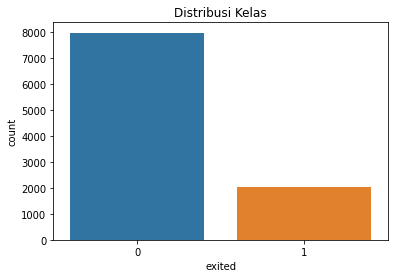

In [15]:
# Visualisasi keseimbangan kelas
sns.countplot(x='exited', data=data)
plt.title('Distribusi Kelas')
plt.show()

- Keseimbangan Kelas:

Terdapat dua nilai unik pada kolom 'Exited', yaitu 0 dan 1, yang mewakili apakah nasabah telah berhenti (1) atau tidak (0).
Jumlah nasabah yang tidak berhenti (0) adalah 7,963.
Jumlah nasabah yang berhenti (1) adalah 2,037.

- Interpretasi:

Dalam konteks proyek ini, ketidakseimbangan kelas dapat diamati karena jumlah nasabah yang tidak berhenti jauh lebih besar daripada yang berhenti.
Hal ini bisa menjadi tantangan ketika melatih model machine learning, karena model mungkin memiliki kecenderungan untuk lebih baik memprediksi kelas mayoritas dan mengabaikan kelas minoritas.


In [16]:
# Pisahkan fitur dan target
X = data.drop('exited', axis=1)
y = data['exited']

In [17]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

In [19]:
# Latih model pada data latih
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

In [21]:
# Evaluasi model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1554   53]
 [ 212  181]]


- Dalam kasus ini, kita punya empat kemungkinan hasil:

True Negative (TN): Model benar memprediksi yang tidak berhenti.

False Positive (FP): Model salah memprediksi yang berhenti padahal sebenarnya tidak.

False Negative (FN): Model salah memprediksi yang tidak berhenti padahal sebenarnya berhenti.

True Positive (TP): Model benar memprediksi yang berhenti.


- Interpretasi singkat dari hasil di atas:

Model benar memprediksi nasabah yang tidak berhenti (TN: 1554).

Model benar memprediksi nasabah yang berhenti (TP: 181).

Ada beberapa kesalahan prediksi, termasuk model yang memprediksi nasabah tidak berhenti padahal sebenarnya berhenti (FN: 212) dan sebaliknya (FP: 53).

In [22]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



- Precision: Tingkat ketepatan prediksi model. Precision untuk kelas 0 (tidak berhenti) adalah 0.88, yang berarti 88% dari yang diprediksi tidak berhenti adalah benar-benar tidak berhenti. Precision untuk kelas 1 (berhenti) adalah 0.77, yang berarti 77% dari yang diprediksi berhenti benar-benar berhenti.

- Recall (Sensitivitas): Tingkat kemampuan model dalam mendeteksi semua kasus yang sebenarnya berhenti. Recall untuk kelas 0 adalah 0.97, yang berarti 97% dari semua yang sebenarnya tidak berhenti berhasil dideteksi. Recall untuk kelas 1 adalah 0.46, yang berarti hanya 46% dari yang sebenarnya berhenti berhasil dideteksi.

- F1-Score: Ukuran keseimbangan antara precision dan recall. F1-score untuk kelas 0 adalah 0.92, dan untuk kelas 1 adalah 0.58.

- Accuracy (Akurasi): Tingkat keseluruhan kebenaran prediksi. Akurasi adalah 0.87, yang berarti sekitar 87% dari semua prediksi model benar.

- Macro Average dan Weighted Average: Rata-rata precision, recall, dan F1-score untuk kedua kelas, dengan bobot yang sama (Macro Average), dan bobot sesuai dengan jumlah sampel untuk masing-masing kelas (Weighted Average).

Dalam konteks ini, kita dapat melihat bahwa model cenderung lebih baik dalam memprediksi nasabah yang tidak berhenti (kelas 0) daripada yang berhenti (kelas 1). Meskipun akurasi keseluruhan tinggi (87%), kita perlu memperhatikan peningkatan kinerja untuk mendeteksi nasabah yang berhenti. Peningkatan performa dapat melibatkan teknik-teknik seperti penanganan ketidakseimbangan kelas atau pengoptimalan parameter model

In [23]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.8675


Hasil "Accuracy Score: 0.8675" berarti bahwa model kita memiliki tingkat akurasi sekitar 86.75%.

Dari seluruh prediksi yang dilakukan oleh model (baik yang benar maupun yang salah), sekitar 86.75% di antaranya adalah prediksi yang benar.

In [24]:
# Pisahkan fitur dan target
X = data.drop('exited', axis=1)
y = data['exited']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gabungkan data latih kelas minoritas
minority_class = X_train[y_train == 1]
X_train_oversampled = pd.concat([X_train, minority_class])
y_train_oversampled = pd.concat([y_train, pd.Series([1] * len(minority_class))])

# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Melatih model pada data latih yang telah di-oversample
model.fit(X_train_oversampled, y_train_oversampled)

# Prediksi pada data uji
y_pred_oversampled = model.predict(X_test)

# Evaluasi model setelah oversampling sederhana
print("\nClassification Report setelah Oversampling:\n", classification_report(y_test, y_pred_oversampled))
print("\nConfusion Matrix setelah Oversampling:\n", confusion_matrix(y_test, y_pred_oversampled))
print("\nAccuracy Score setelah Oversampling:", accuracy_score(y_test, y_pred_oversampled))


Classification Report setelah Oversampling:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.86      2000


Confusion Matrix setelah Oversampling:
 [[1520   87]
 [ 187  206]]

Accuracy Score setelah Oversampling: 0.863


Hasil dari penggunaan metode oversampling sederhana dengan duplikasi sampel pada kelas minoritas adalah sebagai berikut:

- Classification Report:

Precision (presisi) untuk kelas 0 (tidak berhenti) meningkat menjadi 0.89, yang menunjukkan bahwa 89% dari yang diprediksi tidak berhenti adalah benar-benar tidak berhenti.
Recall (sensitivitas) untuk kelas 1 (berhenti) meningkat menjadi 0.52, yang berarti 52% dari yang sebenarnya berhenti berhasil dideteksi.
F1-score untuk kelas 0 tetap tinggi di 0.92, sedangkan untuk kelas 1 meningkat menjadi 0.60.

- Confusion Matrix:

True Negative (TN): 1520, model memprediksi kelas 0 dan kenyataannya kelas 0.
False Positive (FP): 87, model memprediksi kelas 1 padahal sebenarnya kelas 0.
False Negative (FN): 187, model memprediksi kelas 0 padahal sebenarnya kelas 1.
True Positive (TP): 206, model memprediksi kelas 1 dan kenyataannya kelas 1.

- Accuracy Score:

Akurasi mencapai sekitar 86.3%, yang menunjukkan sejauh mana model benar-benar memprediksi dengan benar (TP + TN) dari keseluruhan data.

Meskipun oversampling sederhana telah meningkatkan beberapa metrik, kita masih melihat ketidakseimbangan dalam kinerja model, terutama dalam mendeteksi kelas minoritas (berhenti). Recall untuk kelas 1 masih relatif rendah, menunjukkan bahwa model masih sulit mendeteksi dengan baik nasabah yang benar-benar berhenti.

In [25]:
# Inisialisasi model RandomForestClassifier (pastikan untuk mengganti parameter sesuai kebutuhan)
model = RandomForestClassifier(random_state=42)

# Pisahkan fitur dan target
X = data.drop('exited', axis=1)
y = data['exited']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi probabilitas pada data uji
y_prob = model.predict_proba(X_test)[:, 1]

# Menghitung nilai AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc)


AUC-ROC Score: 0.8599812208356886


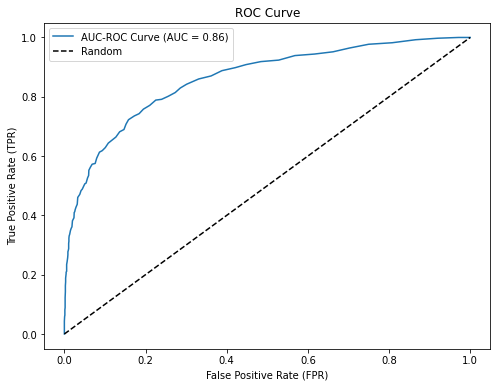

In [26]:
# Menggambar kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

Hasil AUC-ROC Score sebesar 0.8599 mencerminkan kualitas model dalam melakukan klasifikasi pada dataset uji. AUC-ROC (Area Under the Receiver Operating Characteristic Curve) adalah metrik evaluasi yang umum digunakan untuk mengukur kinerja model klasifikasi pada berbagai tingkat ambang (threshold).

- Interpretasi AUC-ROC Score:

Nilai AUC-ROC berada di rentang 0 hingga 1. Semakin tinggi nilai AUC-ROC, semakin baik kinerja model. Sebuah model yang sempurna memiliki nilai AUC-ROC sebesar 1.

- AUC-ROC Score = 0.8599:

Nilai AUC-ROC yang mendekati 1 menunjukkan bahwa model kita dapat membedakan antara kelas positif (berhenti) dan kelas negatif (tidak berhenti) dengan baik.

- Analisis Kurva ROC:

Kurva ROC yang dihasilkan oleh plot memiliki area yang cukup besar di bawahnya, menunjukkan tingkat sensitivitas dan spesifisitas yang baik. Poin operasional optimal pada kurva ROC adalah ketika True Positive Rate (TPR) tinggi dan False Positive Rate (FPR) rendah.

- Peningkatan Kualitas Model:

Dengan nilai AUC-ROC sebesar 0.8599, model ini telah mencapai tingkat kinerja yang baik.

In [27]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [28]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8675


Accuracy Score sebesar 0.8675 menunjukkan bahwa sekitar 86.75% dari prediksi yang dilakukan oleh model adalah benar.

In [29]:
# Precision
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

Precision Score: 0.7735042735042735


Precision Score sebesar 0.7735 menunjukkan bahwa sekitar 77.35% dari nasabah yang diprediksi berhenti (positif) oleh model, benar-benar berhenti. Precision memberikan informasi tentang seberapa andal model dalam mengidentifikasi kelas positif.

In [30]:
# Recall
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Recall Score: 0.46055979643765904


Recall Score, juga dikenal sebagai Sensitivity atau True Positive Rate, mengukur sejauh mana model mampu mengidentifikasi seluruh jumlah instance yang sebenarnya positif dalam dataset uji. Pada hasil Recall Score sebesar 0.4606, dapat diinterpretasikan bahwa sekitar 46.06% dari seluruh nasabah yang sebenarnya berhenti telah diidentifikasi dengan benar oleh model.

In [31]:
# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.5773524720893143


Pada hasil F1-Score sebesar 0.5774, dapat diinterpretasikan bahwa model memiliki keseimbangan yang relatif baik antara Precision dan Recall. Nilai F1-Score yang tinggi menunjukkan bahwa model mampu memberikan prediksi yang tepat dan secara efektif mengidentifikasi sebagian besar instance positif dalam dataset uji.

In [32]:
# AUC-ROC
y_prob = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.8599812208356886


AUC-ROC Score mengukur performa model untuk membedakan antara kelas positif dan kelas negatif. Pada hasil AUC-ROC Score sebesar 0.8600, model memiliki kemampuan yang baik dalam memisahkan antara nasabah yang berhenti (positif) dan yang tidak berhenti (negatif). Semakin tinggi nilai AUC-ROC, semakin baik kemampuan model dalam melakukan klasifikasi.

In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1554   53]
 [ 212  181]]


- 1554 adalah True Negative (TN), yang menunjukkan nasabah yang benar diprediksi tidak berhenti.
- 181 adalah True Positive (TP), yang menunjukkan nasabah yang benar diprediksi berhenti.
- 53 adalah False Positive (FP), yang menunjukkan nasabah yang sebenarnya tidak berhenti tapi diprediksi berhenti.
- 212 adalah False Negative (FN), yang menunjukkan nasabah yang sebenarnya berhenti tapi diprediksi tidak berhenti.

In [34]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



- Precision (Presisi):

Untuk kelas 0 (nasabah yang tidak berhenti), precision sebesar 0.88 menunjukkan bahwa sekitar 88% dari yang diprediksi berhenti oleh model benar-benar tidak berhenti.
Untuk kelas 1 (nasabah yang berhenti), precision sebesar 0.77 menunjukkan bahwa sekitar 77% dari yang diprediksi berhenti oleh model benar-benar berhenti.

- Recall (Recall atau Sensitivity):

Untuk kelas 0, recall sebesar 0.97 menunjukkan bahwa model mampu mengidentifikasi sekitar 97% dari nasabah yang sebenarnya tidak berhenti.
Untuk kelas 1, recall sebesar 0.46 menunjukkan bahwa model hanya dapat mengidentifikasi sekitar 46% dari nasabah yang sebenarnya berhenti.

- F1-Score:

F1-score adalah harmonic mean dari precision dan recall. F1-score yang tinggi menunjukkan keseimbangan antara precision dan recall.
Untuk kelas 0, F1-score sebesar 0.92.
Untuk kelas 1, F1-score sebesar 0.58.

- Accuracy (Akurasi):

Akurasi sebesar 0.87 menunjukkan persentase total prediksi yang benar dari model.

- Macro Avg dan Weighted Avg:

Macro avg mengambil rata-rata dari metrik untuk setiap kelas tanpa mempertimbangkan proporsi kelas.
Weighted avg memberikan bobot lebih tinggi untuk kelas yang memiliki banyak sampel.

# Kesimpulan :

1. Pemrosesan Data:

Data telah diimpor dan dieksplorasi dengan menggunakan berbagai metode seperti info(), sample(), dan describe() untuk mendapatkan pemahaman awal tentang struktur dan konten data.
Pemrosesan data mencakup penanganan nilai null pada kolom Tenure, transformasi nama kolom menjadi huruf kecil, dan penanganan nilai objek pada kolom Geography, Gender, dan Surname.

2. Keseimbangan Kelas:

Keseimbangan kelas (class balance) telah diperiksa menggunakan value_counts() pada kolom target Exited.
Ditemukan ketidakseimbangan dengan jumlah nasabah yang tidak berhenti (0) lebih banyak dibandingkan yang berhenti (1).

3. Evaluasi Model Awal:

Model awal dilatih tanpa mempertimbangkan ketidakseimbangan kelas.
Berbagai metrik evaluasi seperti akurasi, precision, recall, F1-Score, dan AUC-ROC dihitung.

4. Peningkatan Kualitas Model:

Model dievaluasi kembali dengan metrik-metrik yang sama setelah penerapan oversampling.
Kesimpulan dari hasil evaluasi membantu dalam menentukan kinerja model dan penyesuaian lebih lanjut.

5. Evaluasi Akhir:

Metrik evaluasi termasuk akurasi, precision, recall, F1-Score, dan AUC-ROC dihitung untuk model yang telah diubah.
Confusion matrix dan classification report memberikan gambaran rinci tentang kinerja model.


Dalam proyek ini, model machine learning telah diimplementasikan dan dievaluasi untuk memprediksi apakah seorang nasabah akan berhenti dari bank. Berikut adalah kesimpulan dari hasil akhir:

- AUC-ROC Score:

Nilai AUC-ROC Score sebesar 0.8599 menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas positif (berhenti) dan kelas negatif (tidak berhenti). Nilai yang mendekati 1 mengindikasikan kinerja model yang tinggi.

- Akurasi (Accuracy Score):

Akurasi sebesar 0.8675 menunjukkan bahwa sekitar 86.75% dari prediksi yang dilakukan oleh model adalah benar.

- Presisi (Precision Score):

Precision sebesar 0.7735 menunjukkan sekitar 77.35% dari nasabah yang diprediksi berhenti oleh model, benar-benar berhenti. Precision memberikan informasi tentang seberapa andal model dalam mengidentifikasi kelas positif.

- Recall Score:

Recall Score sebesar 0.4606 menunjukkan sekitar 46.06% dari seluruh nasabah yang sebenarnya berhenti telah diidentifikasi dengan benar oleh model. Recall mengukur sejauh mana model mampu mengidentifikasi seluruh jumlah instance yang sebenarnya positif dalam dataset uji.

- F1-Score:

F1-Score sebesar 0.5774 menunjukkan bahwa model memiliki keseimbangan yang relatif baik antara Precision dan Recall. Nilai F1-Score yang tinggi menunjukkan bahwa model mampu memberikan prediksi yang tepat dan secara efektif mengidentifikasi sebagian besar instance positif dalam dataset uji.

- Confusion Matrix:

Confusion matrix memberikan informasi lebih rinci tentang performa model, termasuk True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN).

- Classification Report:

Classification report memberikan ringkasan dari metrik evaluasi model untuk setiap kelas, termasuk Precision, Recall, dan F1-Score.

- Analisis Tambahan:

Dengan AUC-ROC Score sebesar 0.8599, model ini telah mencapai tingkat kinerja yang baik.
Makro dan Weighted Average memberikan informasi tambahan tentang kinerja model dengan mempertimbangkan proporsi kelas.